In [27]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from CHAMP.CHAMP_Layer import CHAMP_Layer
from CHAMP.DataLoader import LoadData
from CHAMP.DataTools import LocalContrastNormalization, FilterInputData, GenerateMask
from CHAMP.Monitor import DisplayDico, DisplayConvergenceCHAMP, DisplayWhere

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading the Face DataBase

In [5]:
path = "../../../Science/These/Rapport d'avancement/database/Face_DataBase/"

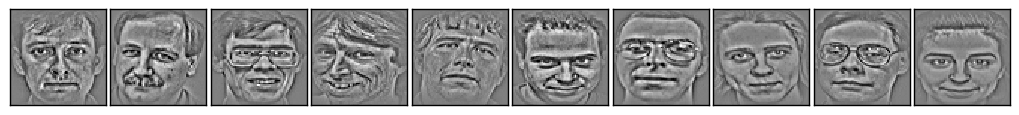

In [6]:
TrSet, TeSet = LoadData('Face',path,decorrelate=False,resize=(65,65))
N_TrSet,_,_,_ = LocalContrastNormalization(TrSet)
Filtered_L_TrSet = FilterInputData(N_TrSet,sigma=0.25,style='Custom',start_R=15)
to_display = Filtered_L_TrSet[0][0,0:10,:,:,:]
DisplayDico(to_display)

## Training the ConvMP_Layer

In [24]:
## MP Parameter
nb_dico = 16
dico_size=(13,13)
l0 = 20
seed = 30
## Learning PArameter
eta = 0.07
nb_epoch = 150

In [25]:
L1 = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico, dico_size=dico_size,verbose=2)
dico = L1.TrainLayer(Filtered_L_TrSet, eta=eta, nb_epoch=nb_epoch,seed=seed)

epoch 1 - 75 done in 2m28s
epoch 75 - 150 done in 2m32s


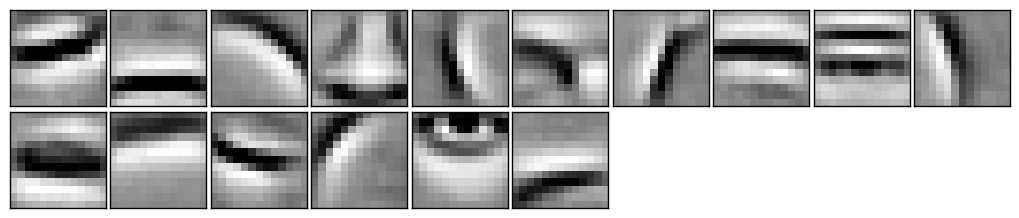

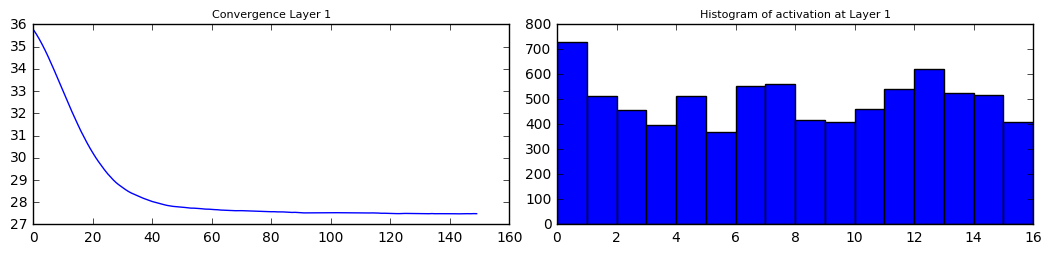

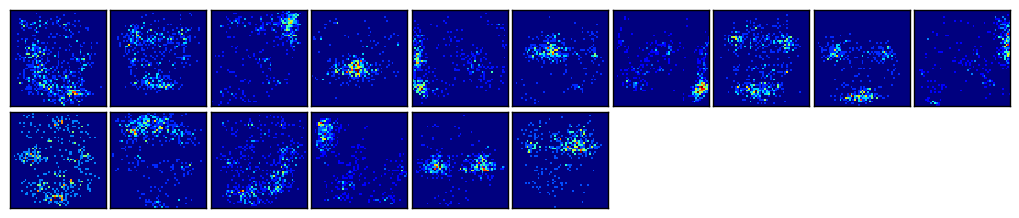

In [26]:
DisplayDico(L1.dictionary)
DisplayConvergenceCHAMP(L1, to_display=['error','histo'])
DisplayWhere(L1.where)

## Training the ConvMP Layer with a mask for the filters

In [47]:
## MP Parameter
nb_dico = 16
dico_size=(13,13)
l0 = 20
seed=30
## Learning PArameter
eta = 0.07
nb_epoch = 150

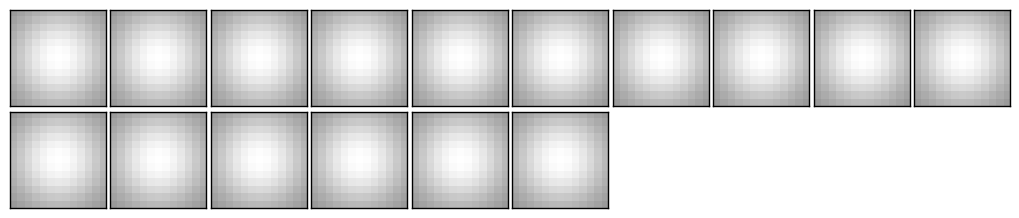

In [ ]:
mask = GenerateMask(full_size=(16,1,13,13),sigma=0.8,style='Gaussian')
DisplayDico(mask)

In [ ]:
L1_mask = CHAMP_Layer(l0_sparseness=l0, nb_dico=nb_dico, dico_size=dico_size,mask=mask, verbose=2)
dico_mask = L1_mask.TrainLayer(Filtered_L_TrSet, eta=eta, nb_epoch=nb_epoch,seed=seed)

epoch 1 - 75 done in 2m34s


In [ ]:
DisplayDico(L1_mask.dictionary)
DisplayConvergenceCHAMP(L1_mask, to_display=['error','histo'])
DisplayWhere(L1_mask.where)